In order to filter the descriptors, a principle component analysis (PCA) can be applied. This is done to see which descriptors show the most correlation with the inhibiting molecules.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

,SMILES,ALDH1_inhibition,ROMol,n_Atoms
0,[NH3+]CCSSCC[NH3+],0,,8
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0,,14
2,[NH3+]CCCCCCCCCC[NH3+],0,,12
3,[NH3+]CCSSCC[NH3+],0,,8
4,ClCC[NH+](CCCl)CCCl,0,,10
...,...,...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1,,17
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1,,18
997,O=C(CCl)NC1CCCc2ccccc21,1,,15
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1,,30

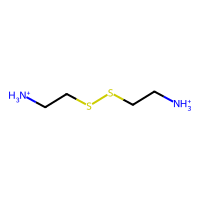
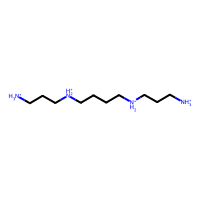
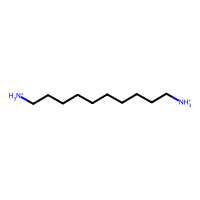
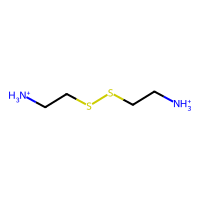
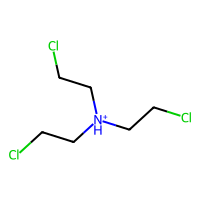
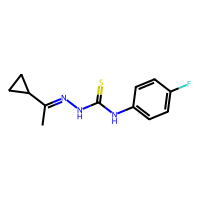
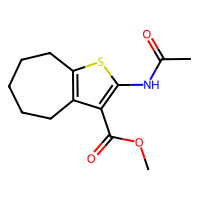
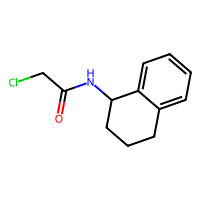
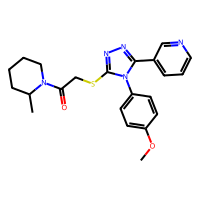
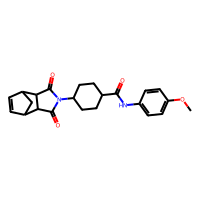

In [2]:
# Creating smiles dataframe
df_smiles = pd.read_csv('tested_molecules_v2.csv')
mols = [Chem.MolFromSmiles(smile) for smile in df_smiles.SMILES]
PandasTools.AddMoleculeColumnToFrame(df_smiles, smilesCol='SMILES')
df_smiles["n_Atoms"] = df_smiles['ROMol'].map(lambda x: x.GetNumAtoms())

df_smiles

In [3]:
# 2D RDkit descriptors
desc_list = [desc[0] for desc in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
rdkit_desc = [calc.CalcDescriptors(m) for m in mols]

# Calculate physiochemical property descriptors
phc_desc_list = [i for i in desc_list if not i.startswith('fr_')]
rdkit_desc_sub = [calc.CalcDescriptors(m) for m in mols]

# Add physiochemical descriptors to dataframe
df_phc_desc = pd.DataFrame()
for i in range(len(phc_desc_list)):
    df_phc_desc[phc_desc_list[i]] = [
        rdkit_desc_sub[j][i] for j in range(len(rdkit_desc_sub))]

In [4]:
df_phc_desc

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,3.733529,3.733529,1.036517,1.036517,0.388058,154.304,140.192,154.058743,50,0,...,2,2,4,5,0,0,0,0,-1.1484,40.4262
1,3.831341,3.831341,1.078701,1.078701,0.249555,206.378,176.138,206.244853,86,0,...,0,4,4,11,0,0,0,0,-3.8426,57.2970
2,3.837048,3.837048,1.112603,1.112603,0.480826,174.332,148.124,174.208502,74,0,...,0,2,2,9,0,0,0,0,0.5910,52.4462
3,3.733529,3.733529,1.036517,1.036517,0.388058,154.304,140.192,154.058743,50,0,...,2,2,4,5,0,0,0,0,-1.1484,40.4262
4,5.560741,5.560741,0.683642,0.683642,0.605633,205.536,192.432,204.010809,62,0,...,0,1,4,6,0,0,0,0,0.5877,47.7237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.675698,12.675698,0.266642,-0.266642,0.492481,251.330,237.218,251.089247,90,0,...,2,2,5,3,1,0,1,2,2.8980,71.5894
996,11.894216,11.894216,0.155961,-0.348935,0.661884,267.350,250.214,267.092914,98,0,...,4,1,5,2,0,0,0,2,2.7620,71.2212
997,11.246766,11.246766,0.040344,-0.084843,0.767040,223.703,209.591,223.076392,80,0,...,1,1,3,2,0,0,0,2,2.4190,60.9837
998,12.811065,12.811065,0.152230,0.152230,0.561228,423.542,398.342,423.172896,156,0,...,7,0,8,6,0,1,1,4,3.8310,116.8920


Currently, there are a total of 123 descriptors included. This number is relatively large and needs to be shrunk. The highly correlating descriptors are removed from the dataframe. 

<ipython-input-5-730db507c2e2>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))


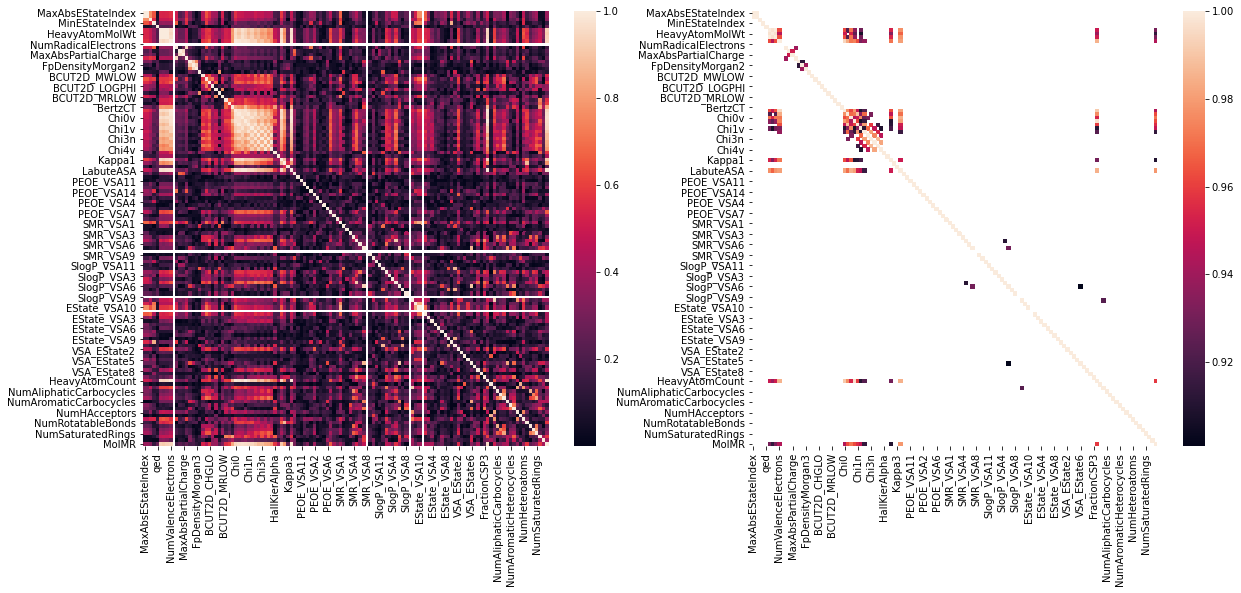

In [5]:
# Checking correlation between the variables
df_corr = df_phc_desc.corr().abs()
df_corr_high = df_corr[df_corr > 0.9]

# Plotting correlation matrices as heatmaps
fig, ax = plt.subplots(1, 2, squeeze=False, figsize=(20,8))
sns.heatmap(df_corr, ax=ax[0,0])
sns.heatmap(df_corr_high, ax=ax[0,1]);

# Drop highly correlated values
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
df_phc_desc.drop(to_drop, axis=1, inplace=True);

The data is minmax scaled so that none of the variables can dominate the PCA procedure.

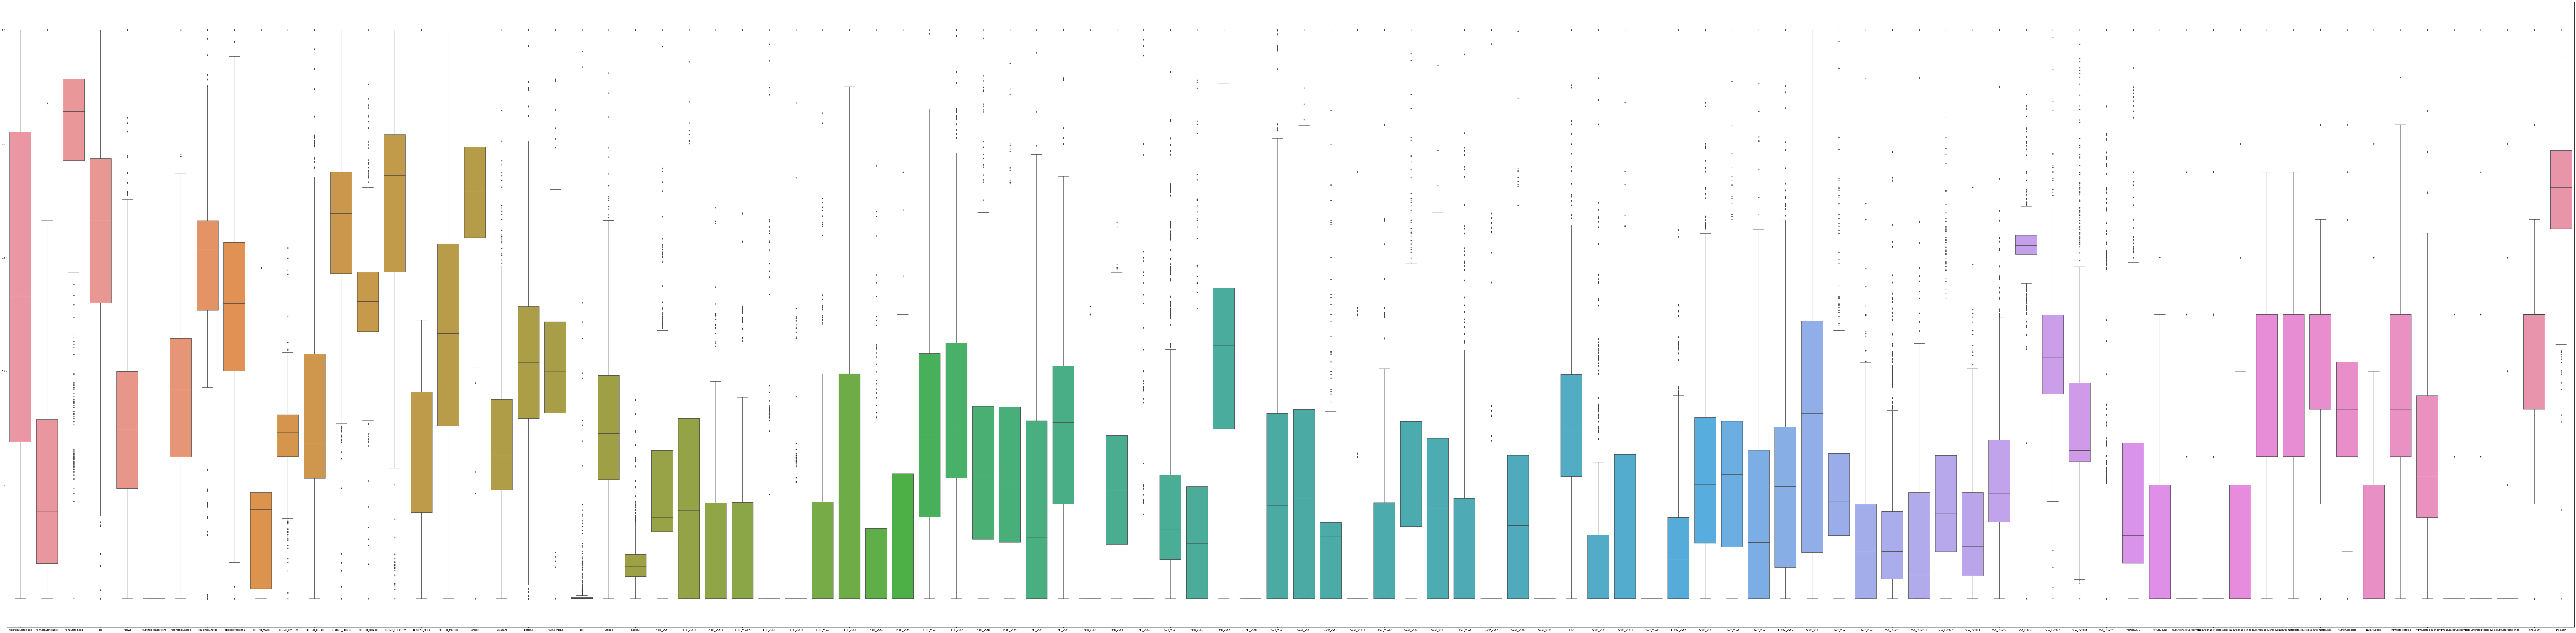

In [6]:
# MinMax scaling of the descriptors
scale = MinMaxScaler()
phc_desc_scaled = scale.fit_transform(df_phc_desc)

# Transform back to dataframe
for desc in to_drop:
    if desc in phc_desc_list:
        phc_desc_list.remove(desc)

df_phc_desc_scaled = pd.DataFrame(phc_desc_scaled, columns = phc_desc_list)

fig, ax = plt.subplots(1, 1, figsize=(200, 50))
sns.boxplot(data=df_phc_desc_scaled);

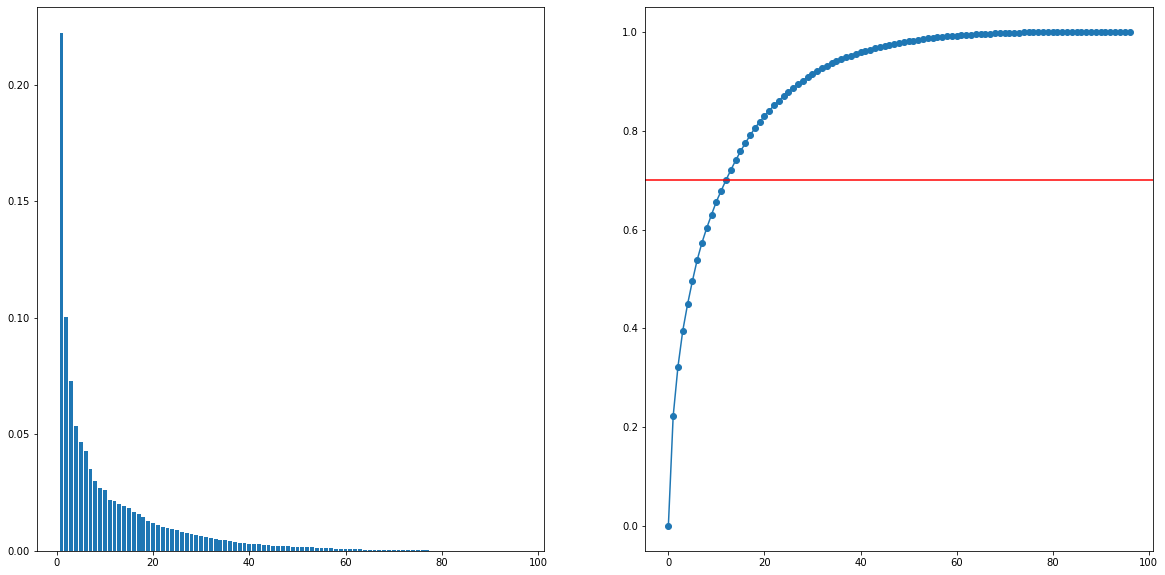

In [7]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(df_phc_desc_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

# Create dataframe with loadings
features = df_phc_desc_scaled.columns
df_loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=features,  # and the rows are the original features
)

# Plot variances
fig, ax = plt.subplots(1, 2, figsize=(20,10))
n = pca.n_components_
grid = np.arange(1, n + 1)

# Explained variance
evr = pca.explained_variance_ratio_
ax[0].bar(grid, evr)

# Cumulative Variance
cv = np.cumsum(evr)
ax[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")

# Plot line at 90% of dataset variance
ax[1].axhline(y=0.7, color='r', linestyle='-');

There are 14 principal components required to achieve a total variance of 0.7.

In [8]:
# Visualize the loadings
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96
MaxAbsEStateIndex,0.307680,-0.058721,0.214001,-0.041744,-0.267798,-0.008138,0.042639,-0.132306,0.134456,-0.070963,...,3.119509e-16,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
MinAbsEStateIndex,-0.151560,0.037346,-0.127653,-0.025314,0.059202,-0.033558,-0.060705,0.121985,-0.008341,-0.003300,...,1.826896e-16,6.613016e-17,-2.093932e-17,-2.257252e-16,2.069851e-16,-1.786154e-16,1.929880e-17,-8.109832e-17,-5.196717e-17,5.139118e-17
MinEStateIndex,-0.165427,-0.003126,-0.289330,0.054660,0.158001,-0.041868,0.215728,-0.093980,0.047774,-0.011897,...,-1.107430e-16,8.294346e-17,-2.545633e-16,7.834848e-17,-1.042881e-16,4.395321e-17,-2.613173e-17,4.583067e-17,1.491135e-17,-3.286069e-16
qed,-0.029152,0.091880,0.090406,0.007496,-0.169668,0.047363,-0.038894,-0.104076,0.237760,0.238926,...,-1.204302e-16,-1.275790e-16,1.168440e-17,3.723238e-18,-4.852910e-17,-7.590831e-17,1.064548e-16,-1.310896e-17,-4.909832e-17,2.574946e-17
MolWt,0.145958,-0.178389,-0.030704,0.173203,-0.021286,0.044542,-0.022536,0.067010,0.017202,-0.029792,...,-1.448218e-15,9.468967e-16,-3.056400e-15,4.214234e-16,8.911807e-16,-2.070875e-17,-5.454576e-16,-1.337269e-15,-6.296600e-17,1.111422e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NumSaturatedCarbocycles,0.054857,0.005280,-0.064978,-0.010301,-0.023210,-0.088387,0.010178,-0.090675,-0.034990,0.038159,...,9.373442e-02,-2.875629e-02,-3.556072e-02,-1.786468e-01,-1.292420e-01,-3.639466e-02,-4.605175e-01,4.293468e-02,7.300160e-02,2.514661e-02
NumSaturatedHeterocycles,0.087428,0.007231,-0.058361,0.010403,-0.007335,-0.074232,0.008049,-0.011831,-0.031625,0.087912,...,9.373442e-02,-2.875629e-02,-3.556072e-02,-1.786468e-01,-1.292420e-01,-3.639466e-02,-4.605175e-01,4.293468e-02,7.300160e-02,2.514661e-02
NumSaturatedRings,0.113828,0.010009,-0.098671,0.000082,-0.024436,-0.130095,0.014581,-0.082005,-0.053292,0.100857,...,-1.171680e-01,3.594536e-02,4.445090e-02,2.233085e-01,1.615526e-01,4.549333e-02,5.756469e-01,-5.366835e-02,-9.125200e-02,-3.143326e-02
RingCount,0.006931,-0.266788,-0.052059,0.039071,0.014490,-0.139505,-0.075213,-0.096381,-0.035190,0.119931,...,1.284490e-01,8.661914e-02,-3.319480e-01,5.063027e-01,-1.307441e-01,1.236552e-01,-6.444492e-02,2.495959e-01,2.190389e-01,1.248862e-02


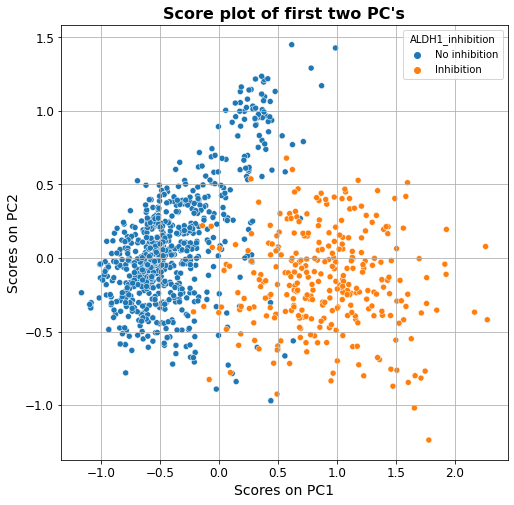

In [9]:
X_pca['ALDH1_inhibition'] = df_smiles['ALDH1_inhibition']
X_pca.replace(0,'No inhibition',inplace=True)
X_pca.replace(1,'Inhibition',inplace=True)

# Creating score plot of first two PC's
fig, ax = plt.subplots(1, 1, squeeze=False, figsize=(8,8))
sns.scatterplot(x=X_pca['PC1'], y=X_pca['PC3'], hue=X_pca['ALDH1_inhibition']);

# Plot titles
plt.title("Score plot of first two PC's", size=16, weight='bold');
plt.xlabel('Scores on PC1', size=14);
plt.ylabel('Scores on PC2', size=14);
plt.tick_params(labelsize=12);
plt.grid()

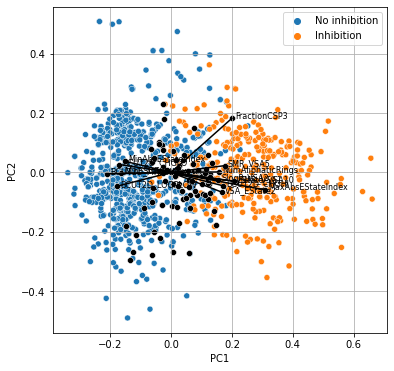

In [12]:
# Create scales for the PC scores 
scalePC1 = 1.0/(X_pca['PC1'].max() - X_pca['PC1'].min())
scalePC2 = 1.0/(X_pca['PC2'].max() - X_pca['PC2'].min())

# Plotting two biplots (scores and loadings) of PC1 & PC2 and PC3 & PC4
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(x=X_pca['PC1']*scalePC1, y=X_pca['PC2']*scalePC2, hue=X_pca['ALDH1_inhibition'])
sns.scatterplot(data=df_loadings, x='PC1', y='PC2', color='k')

good_descriptors = []
for line in range(0,df_loadings.shape[0]):
    if not((df_loadings.PC1[line] > -0.15) and (df_loadings.PC1[line] < 0.15)):
        plt.text(df_loadings.PC1[line] + 0.01, df_loadings.PC2[line], 
        df_loadings.index[line], horizontalalignment='left', size=8)
        sns.lineplot(x=[0,df_loadings.PC1[line]], y=[0,df_loadings.PC2[line]], color='k')
        if df_loadings.PC1[line] > 0:
            corr = "Positive"
        else:
            corr = "Negative"
        good_descriptors.append((df_loadings.index[line],corr))

# Plot titles
plt.grid()

In [13]:
good_descriptors

[('MaxAbsEStateIndex', 'Positive'),
 ('MinAbsEStateIndex', 'Negative'),
 ('MinEStateIndex', 'Negative'),
 ('BCUT2D_CHGHI', 'Positive'),
 ('BCUT2D_CHGLO', 'Negative'),
 ('BCUT2D_LOGPLOW', 'Negative'),
 ('BCUT2D_MRLOW', 'Negative'),
 ('SMR_VSA1', 'Positive'),
 ('SMR_VSA5', 'Positive'),
 ('SlogP_VSA2', 'Positive'),
 ('EState_VSA10', 'Positive'),
 ('VSA_EState2', 'Positive'),
 ('FractionCSP3', 'Positive'),
 ('NumAliphaticRings', 'Positive')]